In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
trainwsdm=pd.read_csv("/Users/sandip/Data/Kaggle/WSDM/train.csv")
memebers=pd.read_csv("/Users/sandip/Data/Kaggle/WSDM/members.csv")
extrasongs=pd.read_csv("/Users/sandip/Data/Kaggle/WSDM/song_extra_info.csv")
sogns=pd.read_csv("/Users/sandip/Data/Kaggle/WSDM/songs.csv")

In [3]:
memebers=pd.read_csv("/Users/sandip/Data/Kaggle/WSDM/members.csv")

In [4]:
memebers["rDate"]=pd.to_datetime(memebers["registration_init_time"],format="%Y%m%d")
memebers["eDate"]=pd.to_datetime(memebers["expiration_date"],format="%Y%m%d")
days1=memebers.eDate-memebers.rDate
days=[d.days for d in days1]
memebers["RemainingDaysOfSub"]=days

In [5]:
memebers["regisetration_year"]=memebers["registration_init_time"].apply(lambda x:int(str(x)[0:4]))
memebers["regisetration_month"]=memebers["registration_init_time"].apply(lambda x:int(str(x)[4:6]))
memebers["regisetration_day"]=memebers["registration_init_time"].apply(lambda x:int(str(x)[6:8]))

memebers["exp_year"]=memebers["expiration_date"].apply(lambda x:int(str(x)[0:4]))
memebers["exp_month"]=memebers["expiration_date"].apply(lambda x:int(str(x)[4:6]))
memebers["exp_day"]=memebers["expiration_date"].apply(lambda x:int(str(x)[6:8]))

In [6]:
memebers.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date,rDate,eDate,RemainingDaysOfSub,regisetration_year,regisetration_month,regisetration_day,exp_year,exp_month,exp_day
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920,2011-08-20,2017-09-20,2223,2011,8,20,2017,9,20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622,2015-06-28,2017-06-22,725,2015,6,28,2017,6,22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712,2016-04-11,2017-07-12,457,2016,4,11,2017,7,12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907,2015-09-06,2015-09-07,1,2015,9,6,2015,9,7
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613,2017-01-26,2017-06-13,138,2017,1,26,2017,6,13


In [7]:
trainwsdm=trainwsdm.merge(memebers,how='left',on='msno')

In [8]:
trainwsdm.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,expiration_date,rDate,eDate,RemainingDaysOfSub,regisetration_year,regisetration_month,regisetration_day,exp_year,exp_month,exp_day
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,...,20171005,2012-01-02,2017-10-05,2103,2012,1,2,2017,10,5
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24,female,9,...,20170911,2011-05-25,2017-09-11,2301,2011,5,25,2017,9,11
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24,female,9,...,20170911,2011-05-25,2017-09-11,2301,2011,5,25,2017,9,11
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13,24,female,9,...,20170911,2011-05-25,2017-09-11,2301,2011,5,25,2017,9,11
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,0,NaN,7,...,20171005,2012-01-02,2017-10-05,2103,2012,1,2,2017,10,5


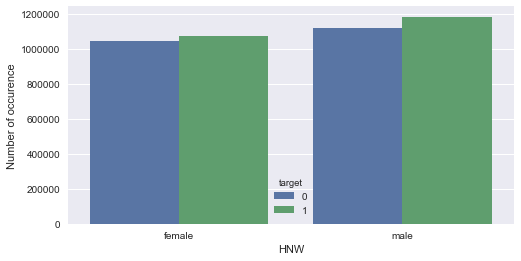

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(data=trainwsdm,x="gender",hue='target')
plt.ylabel("Number of occurence")
plt.xlabel('HNW')
plt.show()

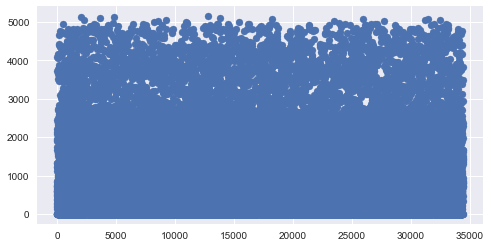

In [19]:
memebers=memebers[memebers["RemainingDaysOfSub"]>0]
plt.figure(figsize=(8,4))
plt.scatter(x=memebers.index,y=memebers.RemainingDaysOfSub)
plt.show()

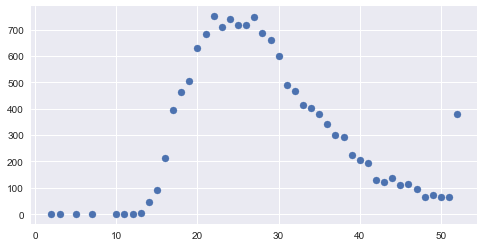

In [26]:
#memebers=memebers[memebers["days"]>0]
lLimit=np.percentile(memebers["bd"],1)
uLimit=np.percentile(memebers["bd"],99)
memebers["bd"].loc[memebers['bd']<lLimit] = lLimit
memebers["bd"].loc[memebers['bd']>uLimit] = uLimit
plt.figure(figsize=(8,4))
m_x=memebers[memebers["bd"] !=0]
cnt=m_x.bd.value_counts()
plt.scatter(x=cnt.index,y=cnt.values)
#sns.barplot(x=cnt.index,y=cnt.values)
#sns.distplot(cnt.values)
plt.show()

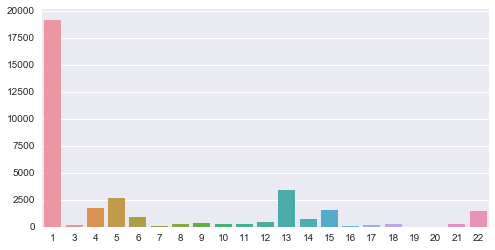

In [28]:
plt.figure(figsize=(8,4))
cnt=memebers.city.value_counts()
#plt.scatter(x=cnt.index,y=cnt.values)
sns.barplot(x=cnt.index,y=cnt.values)
plt.show()

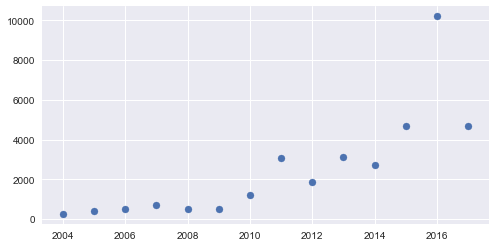

In [12]:
plt.figure(figsize=(8,4))
cnt=memebers.regisetration_year.value_counts()
plt.scatter(x=cnt.index,y=cnt.values)
plt.show()

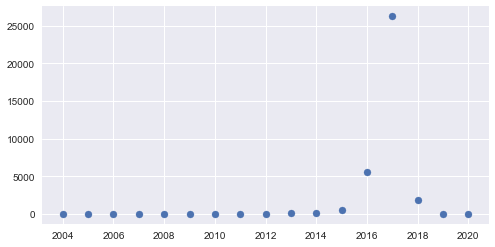

In [13]:
plt.figure(figsize=(8,4))
x=memebers[memebers["exp_year"]>2000]
cnt=x.exp_year.value_counts()
plt.scatter(x=cnt.index,y=cnt.values)
plt.show()

In [14]:
x=memebers[memebers["RemainingDaysOfSub"]<=0]
x.shape

(292, 16)